In [1]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics


digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 10
ensemble = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                             n_estimators=ensemble_size,
                             oob_score=True)

# --- SECTION 3 ---
# Train the ensemble
ensemble.fit(train_x, train_y)

# --- SECTION 4 ---
# Evaluate the ensemble
ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)

# --- SECTION 5 ---
# Print the accuracy
print('Bagging: %.2f' % ensemble_acc)

Bagging: 0.88


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [2]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_digits
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
import numpy as np

digits = load_digits()


train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

np.random.seed(123456)
# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 500
ensemble = ExtraTreesClassifier(n_estimators=ensemble_size, n_jobs=4)

# --- SECTION 3 ---
# Train the ensemble
ensemble.fit(train_x, train_y)

# --- SECTION 4 ---
# Evaluate the ensemble
ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)

# --- SECTION 5 ---
# Print the accuracy
print('Extra Tree Forest: %.2f' % ensemble_acc)

Extra Tree Forest: 0.94


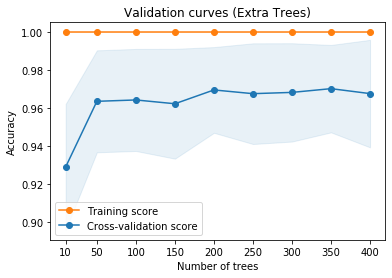

In [4]:
# --- SECTION 1 ---
# Libraries and data loading
from sklearn.datasets import load_digits
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import validation_curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
digits = load_digits()


train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

np.random.seed(123456)
# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 500
ensemble = ExtraTreesClassifier(n_estimators=ensemble_size, n_jobs=4)

param_range = [10, 50, 100, 150, 200, 250, 300, 350, 400]
train_scores, test_scores = validation_curve(ensemble, train_x, train_y, 'n_estimators', param_range,
                       cv=10, scoring='accuracy')

# --- SECTION 3 ---
# Calculate the average and standard deviation for each hyperparameter
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# --- SECTION 4 ---
# Plot the scores
plt.figure()
plt.title('Validation curves (Extra Trees)')
# Plot the standard deviations
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="C1")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="C0")

# Plot the means
plt.plot(param_range, train_scores_mean, 'o-', color="C1",
         label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color="C0",
         label="Cross-validation score")

plt.xticks(param_range)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend(loc="best")

Boosting: 0.89


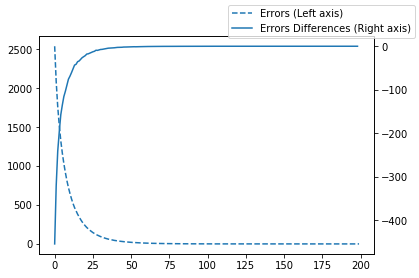

In [8]:
# --- SECTION 1 ---
# Libraries and data loading
import numpy as np

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

np.random.seed(123456)
# --- SECTION 2 ---
# Create the ensemble
ensemble_size = 200
learning_rate = 0.1
ensemble = GradientBoostingClassifier(n_estimators=ensemble_size,
                                      learning_rate=learning_rate)

# --- SECTION 3 ---
# Train the ensemble
ensemble.fit(train_x, train_y)

# --- SECTION 4 ---
# Evaluate the ensemble
ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)

# --- SECTION 5 ---
# Print the accuracy
print('Boosting: %.2f' % ensemble_acc)


import matplotlib.pyplot as plt
diffs = [ensemble.train_score_[i] - ensemble.train_score_[i-1] for i in range(1, len(ensemble.train_score_))]

fig, ax1 = plt.subplots()
ax1.plot(ensemble.train_score_, linestyle='--', label='Errors (Left axis)')


ax2 = ax1.twinx()
ax2.plot(diffs, label='Errors Differences (Right axis)')
fig.legend()

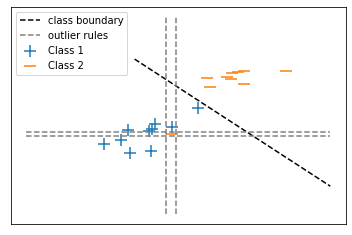

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)

points = np.random.multivariate_normal([1, 1], ([1, 0.5],[0.5, 1]), 10)
points2 = np.random.multivariate_normal([4, 4], ([1, 0.5],[0.5, 1]), 10)

plt.scatter(*zip(*points), label='Class 1', marker='+', s=150)
plt.scatter(*zip(*points2), label='Class 2', marker='_', s=150)
plt.plot([-x+6 for x in range(0,10)], linestyle='--',
          color='black', label='class boundary')

#plt.text(0,5, '+', fontsize=18)
#plt.text(1.5,5.5, '_', fontsize=18)

r = range(-5,10)
stable = [x for x in r]

plt.plot([1.45 for x in r], stable, linestyle='--',
          color='gray', label='outlier rules')
plt.plot([1.9 for x in r], stable, linestyle='--',
          color='gray')

plt.plot(stable,[0.85 for x in r],  linestyle='--',
          color='gray')
plt.plot(stable,[0.55 for x in r],  linestyle='--',
          color='gray')
plt.xticks([], [])
plt.yticks([], [])



plt.legend()